<div style="padding-top: 12px;">
    <center>
        <span style="font-size: 50px; font-family: Montserrat; font-weight: 700;">Prediksi Diabetes</span>
        <br>
        <span style="font-size: 25px; font-family: Montserrat; font-weight: 200; text-align: center;">menggunakan <span style="font-weight: 600;">Random Forest Classifier</span></span>
    </center>
</div>
<hr>

<hr>
<center>
    <div style="font-family: Montserrat; line-height: 1.5; font-size: 14px; font-weight: 400;">Selamat datang di notebook saya! Silakan luangkan waktu anda untuk membaca notebook saya! Jika anda memiliki <b><mark>saran apapun</mark></b> untuk saya, tolong <b><mark>beri tahu saya</mark></b> di kolom komentar. Dan jika anda <b><mark>menyukai pekerjaan saya</mark></b>, tolong <b><mark>beri saya upvote dan like</mark></b>. Terima kasih!</div>
</center>
<hr>

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5; text-align: center;">I | Pendahuluan </div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1 | Tentang Dataset </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Dataset ini merupakan kumpulan dari data medis dan demografi pasien, beserta dengan status diabetes mereka (positif atau negatif). Data ini termasuk fitur-fitur seperti usia, jenis kelamin, indeks massa tubuh, hipertensi, penyakit jantung, catatan merokok, tingkat HbA1c, dan tingkat gula darah. Dataset ini dapat digunakan untuk membangun model <i>machine learning</i> untuk memprediksi diabetes dalam pasien berdasarkan catatan medis dan informasi demografi mereka. Hal ini dapat berguna untuk tenaga kesehatan dalam mengidentifikasi pasien yang mungkin memiliki risiko diabetes dan dalam mengembangkan rencana penanganan. Sebagai tambahan, dataset ini juga dapat digunakan bagi peneliti untuk mengeksplor hubungan antara berbagai faktor medis dan demografi dan kemungkinan pada diabetes.<br><br>
    Sumber dataset: <a href="https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data">Diabetes prediction dataset by MOHAMMED MUSTAFA - Kaggle</a>
</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">2 | Tujuan </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Tujuan dari program ini adalah:
    <ol>
        <li>Melakukan eksplorasi dan visualisasi data.</li>
        <li>Membangun model <i>machine learning</i> untuk melakukan prediksi.</li>
    </ol>
</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">3 | Model </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Model <i>machine learning</i> yang digunakan:
    <ol>
        <li>Random Forest Classifier</li>
    </ol>
</div>

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5; text-align: center;">II | Impor <i>Library</i> </div>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import class_prediction_error, classification_report, confusion_matrix, precision_recall_curve, roc_auc
from yellowbrick.model_selection import LearningCurve

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5; text-align: center;">III | Dataset </div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1 | Memuat Dataset </div>

In [ ]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head().style.background_gradient(cmap='PuBu').hide()

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Female,80.000000,0,1,never,25.190000,6.600000,140,0
Female,54.000000,0,0,No Info,27.320000,6.600000,80,0
Male,28.000000,0,0,never,27.320000,5.700000,158,0
Female,36.000000,0,0,current,23.450000,5.000000,155,0
Male,76.000000,1,1,current,20.140000,4.800000,155,0


## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">2 | Informasi Dataset </div>

In [ ]:
# -- Jumlah baris dan kolom --
print('Jumlah baris\t:', df.shape[0])
print('Jumlah kolom\t:', df.shape[1])

# -- Rekap --
print(df.info(memory_usage=False))

Jumlah baris	: 100000
Jumlah kolom	: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)None


In [ ]:
# -- Jumlah data yang terduplikasi --
print('Jumlah data yang terduplikasi: ', df.duplicated().sum())

Jumlah data yang terduplikasi:  3854


In [ ]:
# -- Jumlah NULL --
print('Jumlah NULL\n', df.isna().sum())

Jumlah NULL
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">3 | Membersihkan Data yang Terduplikasi </div>

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5; text-align: center;">IV | Data Analysis </div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1 | Unique Value pada Masing-masing Variabel </div>

In [ ]:
for column in df.columns:
    unique_val = len(df[column].unique())
    print(f"{column}: {unique_val} unique values")

gender: 3 unique values
age: 102 unique values
hypertension: 2 unique values
heart_disease: 2 unique values
smoking_history: 6 unique values
bmi: 4247 unique values
HbA1c_level: 18 unique values
blood_glucose_level: 18 unique values
diabetes: 2 unique values


## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">2 | Deskripsi Statistika </div>

In [ ]:
df.describe().style.format('{:.2f}')

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.00,96146.00,96146.00,96146.00,96146.00,96146.00,96146.00
mean,41.79,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">3 | Analisis Univariabel </div>

### <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">Data Kategorikal </div>

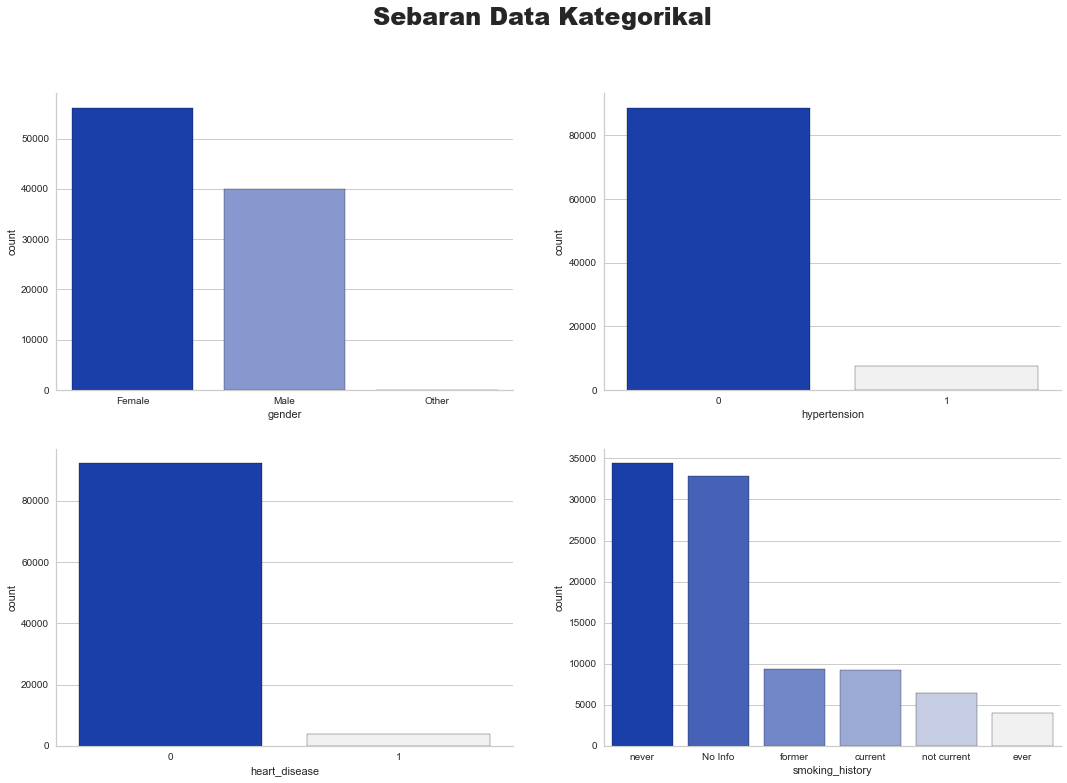

In [ ]:
# -- Konfigurasi Warna --
colors = "light:#0433BF_r"

# -- Figur --
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,2)
plt.suptitle('Sebaran Data Kategorikal', fontweight='heavy', fontsize='24')

# -- Bar Chart --
ax_gender = fig.add_subplot(gs[0,0])
sns.countplot(x='gender', data=df, order=df['gender'].value_counts().index, ax=ax_gender, palette=colors, edgecolor='#000000')
sns.despine()

ax_hypertension = fig.add_subplot(gs[0,1])
sns.countplot(x='hypertension', data=df, order=df['hypertension'].value_counts().index, ax=ax_hypertension, palette=colors, edgecolor='#000000')
sns.despine()

ax_heartdisease = fig.add_subplot(gs[1,0])
sns.countplot(x='heart_disease', data=df, order=df['heart_disease'].value_counts().index, ax=ax_heartdisease, palette=colors, edgecolor='#000000')
sns.despine()

ax_smokinghistory = fig.add_subplot(gs[1,1])
sns.countplot(x='smoking_history', data=df, order=df['smoking_history'].value_counts().index, ax=ax_smokinghistory, palette=colors, edgecolor='#000000')
sns.despine()

plt.show()

<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <i>Insight</i>:
    <ol>
        <li>Terdapat tiga data jenis kelamin, laki-laki, perempuan, dan 'lainnya', dengan data terbanyak adalah perempuan.</li>
        <li>Pasien dengan hipertensi jauh lebih sedikit dibanding dengan yang tidak mengidap hipertensi.</li>
        <li>Pasien dengan penyakit jantung jauh lebih sedikit dibanding dengan yang tidak mengidap penyakit jantung.</li>
        <li>Data catatan merokok memiliki 5 data, tidak pernah, tidak ada informasi, mantan perokok, perokok, sedang tidak merokok, dan pernah merokok. Pasien yang tidak pernah merokok merupakan yang terbanyak, dan pasien yang pernah merokok adalah yang paling sedikit.</li>
    </ol>
</div>

### <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">Data Numerikal </div>

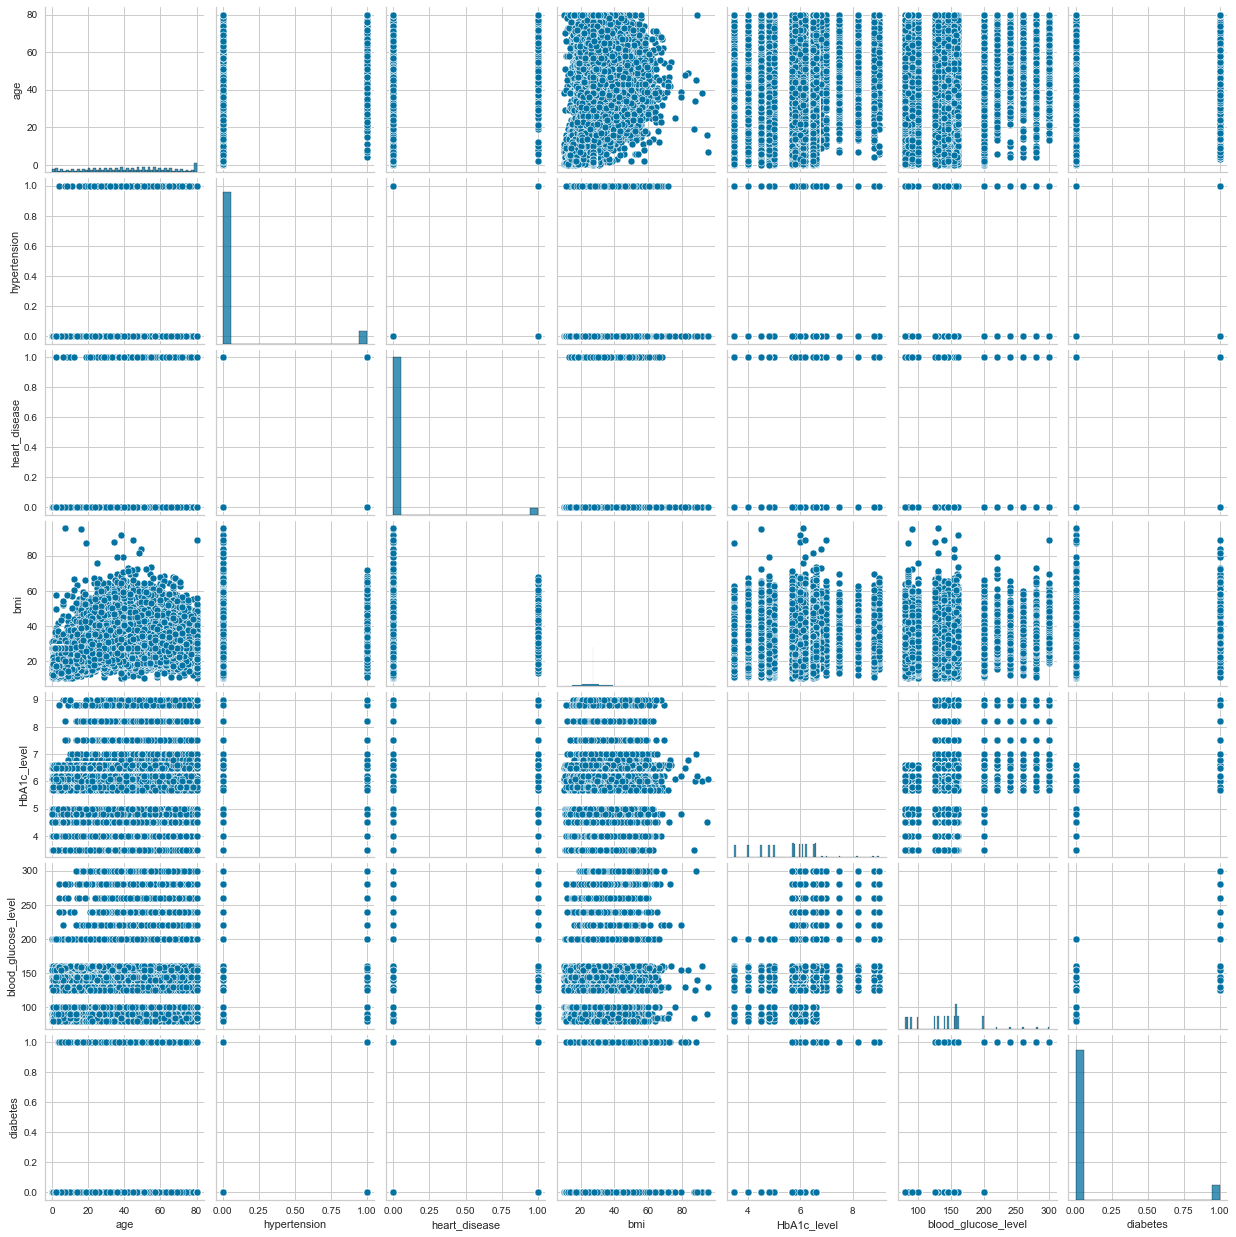

In [ ]:
# -- Pair Plot --
sns.pairplot(df)
sns.despine()

plt.show()

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4 | Analisis Bivariabel </div>

### <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">Numerikal vs numerikal</div>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


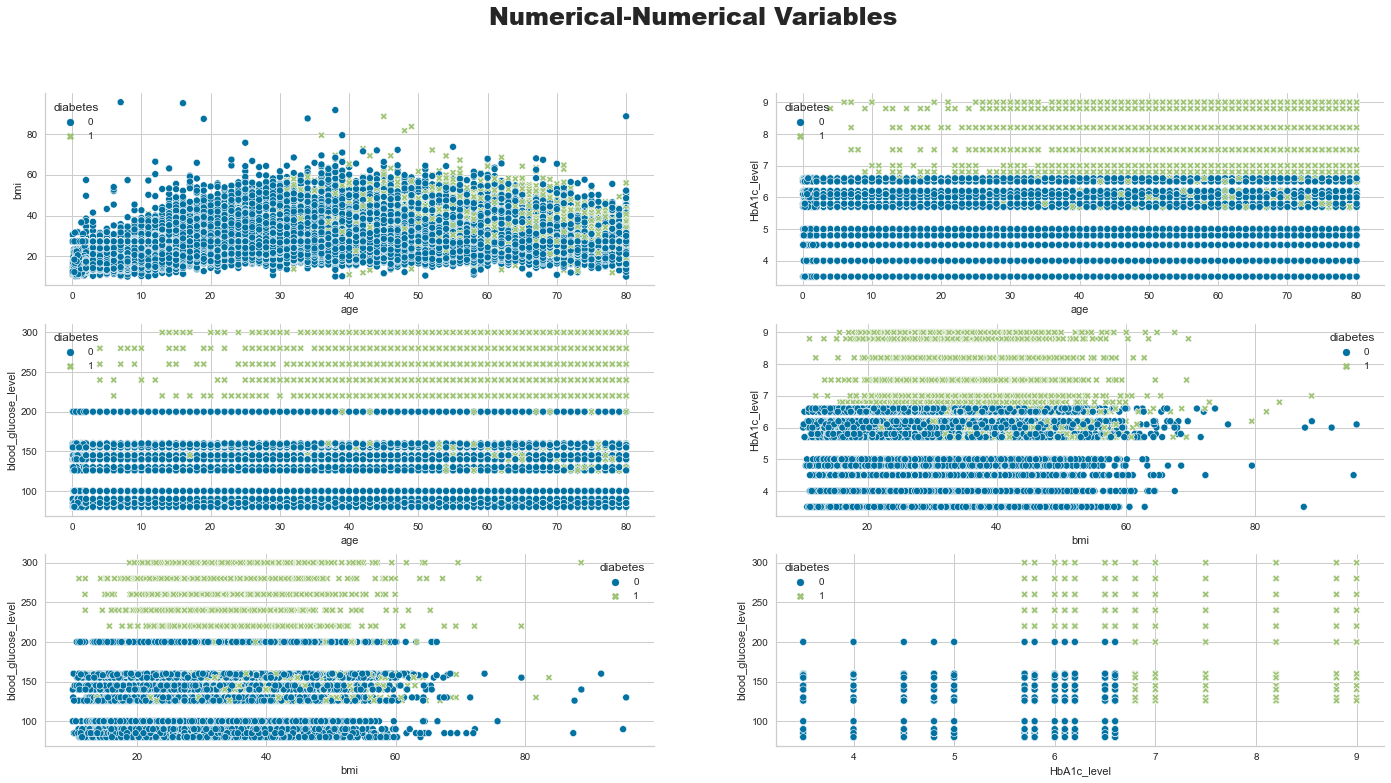

In [ ]:
# -- Konfigurasi Warna --
colors = ['#0433BF', '#FFFF00']

# -- Figur --
fig = plt.figure(figsize=(24,12))
gs = fig.add_gridspec(3,2)
plt.suptitle('Numerical-Numerical Variables', fontweight='heavy', fontsize='24')

# -- Scatter Plot --
ax1 = fig.add_subplot(gs[0,0])
sns.scatterplot(data=df, x='age', y='bmi', hue='diabetes', style='diabetes', ax=ax1)
sns.despine()

ax2 = fig.add_subplot(gs[0,1])
sns.scatterplot(data=df, x='age', y='HbA1c_level', hue='diabetes', style='diabetes', ax=ax2)
sns.despine()

ax3 = fig.add_subplot(gs[1,0])
sns.scatterplot(data=df, x='age', y='blood_glucose_level', hue='diabetes', style='diabetes', ax=ax3)
sns.despine()

ax4 = fig.add_subplot(gs[1,1])
sns.scatterplot(data=df, x='bmi', y='HbA1c_level', hue='diabetes', style='diabetes', ax=ax4)
sns.despine()

ax5 = fig.add_subplot(gs[2,0])
sns.scatterplot(data=df, x='bmi', y='blood_glucose_level', hue='diabetes', style='diabetes', ax=ax5)
sns.despine()

ax6 = fig.add_subplot(gs[2,1])
sns.scatterplot(data=df, x='HbA1c_level', y='blood_glucose_level', hue='diabetes', style='diabetes', ax=ax6)
sns.despine()

plt.show()

<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <i>Insight</i>:
    <ol>
        <li>Penderita diabetes rata-rata di atas 30 tahun. Namun, banyak juga orang-orang yang berusia di atas 30 tahun yang tidak menderita diabetes.</li>
        <li>Penderita diabetes kebanyakan memiliki hemoglobin A1c di atas 7 dan tidak bergantung usia.</li>
        <li>Penderita diabetes kebanyakan memiliki tingkat gula darah di atas 200 dan tidak bergantung usia.</li>
        <li>Rata-rata bmi dari keseluruhan sampel di bawah 60, dan orang-orang yang memiliki hemoglobin A1c di atas 7 menderita diabetes.</li>
        <li>Rata-rata bmi dari keseluruhan sampel di bawah 60, dan orang-orang yang memiliki hemoglobin A1c di atas 7 menderita diabetes.</li>
        <li>Orang-orang yang memiliki diabetes memiliki hemoglobin A1c di atas 7 dan gula darah di atas 200.</li>
    </ol>
    <br>
    Kesimpulan: Variabel yang paling berpengaruh dalam diagnosa diabetes adalah level hemoglobin A1c dan level gula darah.
</div>

### <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">Numerikal vs kategorikal (by Gender) </div>

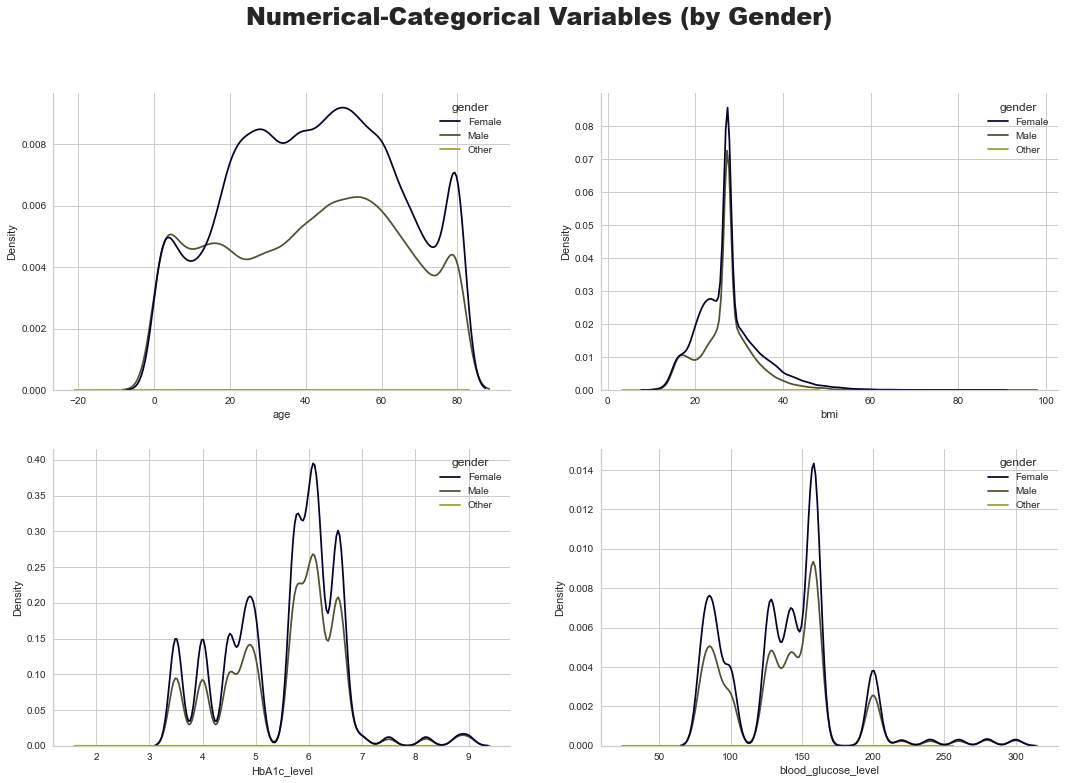

In [ ]:
# -- Konfigurasi Warna --
colors = "blend:#060033,#A29D2C"

# -- Figur --
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,2)
plt.suptitle('Numerical-Categorical Variables (by Gender)', fontweight='heavy', fontsize='24')

# -- KDE Plot --
ax1 = fig.add_subplot(gs[0,0])
sns.kdeplot(data=df, x='age', hue='gender', palette=colors, ax=ax1)
sns.despine()

ax2 = fig.add_subplot(gs[0,1])
sns.kdeplot(data=df, x='bmi', hue='gender', palette=colors, ax=ax2)
sns.despine()

ax3 = fig.add_subplot(gs[1,0])
sns.kdeplot(data=df, x='HbA1c_level', hue='gender', palette=colors, ax=ax3)
sns.despine()

ax4 = fig.add_subplot(gs[1,1])
sns.kdeplot(data=df, x='blood_glucose_level', hue='gender', palette=colors, ax=ax4)
sns.despine()

plt.show()

<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <i>Insight</i>:
    <ol>
        <li>Garis grafik untuk variabel perempuan (female) selalu berada di atas, menggambarkan data perempuan adalah data terbanyak untuk gender.</li>
        <li>Garis untuk kategori other tidak terlihat, karena data other sangat sedikit.</li>
        <li>Garis untuk kategori male dan female cenderung serupa.</li>
    </ol>
</div>

### <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">Numerikal vs kategorikal (by Hypertension) </div>

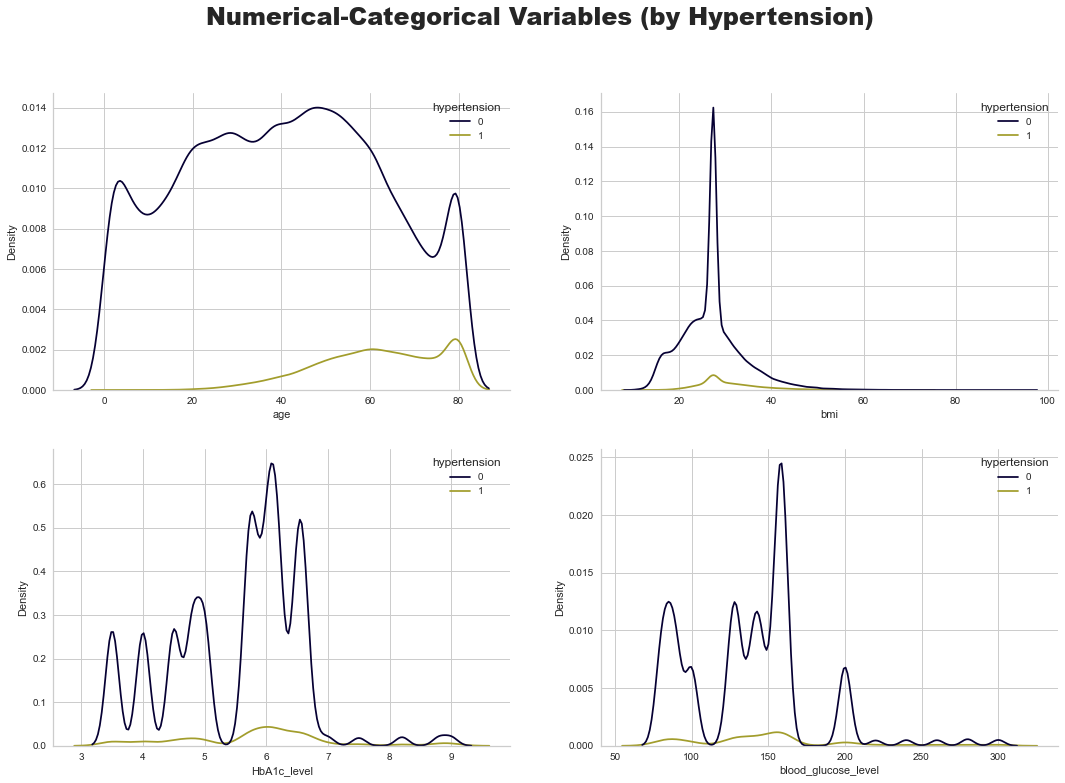

In [ ]:
# -- Konfigurasi Warna --
colors = "blend:#060033,#A29D2C"

# -- Figur --
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,2)
plt.suptitle('Numerical-Categorical Variables (by Hypertension)', fontweight='heavy', fontsize='24')

# -- KDE Plot --
ax1 = fig.add_subplot(gs[0,0])
sns.kdeplot(data=df, x='age', hue='hypertension', palette=colors, ax=ax1)
sns.despine()

ax2 = fig.add_subplot(gs[0,1])
sns.kdeplot(data=df, x='bmi', hue='hypertension', palette=colors, ax=ax2)
sns.despine()

ax3 = fig.add_subplot(gs[1,0])
sns.kdeplot(data=df, x='HbA1c_level', hue='hypertension', palette=colors, ax=ax3)
sns.despine()

ax4 = fig.add_subplot(gs[1,1])
sns.kdeplot(data=df, x='blood_glucose_level', hue='hypertension', palette=colors, ax=ax4)
sns.despine()


plt.show()

<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <i>Insight</i>:
    <ol>
        <li>Grafik di atas menggambarkan bahwa data orang-orang yang tidak menderita hipertensi lebih banyak dibanding orang-orang yang menderita hipertensi.</li>
        <li>Grafik untuk orang-orang yang menderita cenderung landai, menggambarkan data yang ada cukup sedikit.</li>
        <li>Pasien yang menderita hipertensi kebanyakan di usia lanjut.</li>
        <li>Data pasien yang menderita hipertensi kebanyakan memiliki bmi sekitar 25.</li>
        <li>Pasien yang menderita hipertensi kebanyakan tingkat HbA1c-nya adalah 6.</li>
        <li>Data pasien yang menderita hipertensi kebanyakan memiliki tingkat gula darah sekitar 155-160.</li>
    </ol>
</div>

### <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">Numerikal vs kategorikal (by Heart Disease) </div>

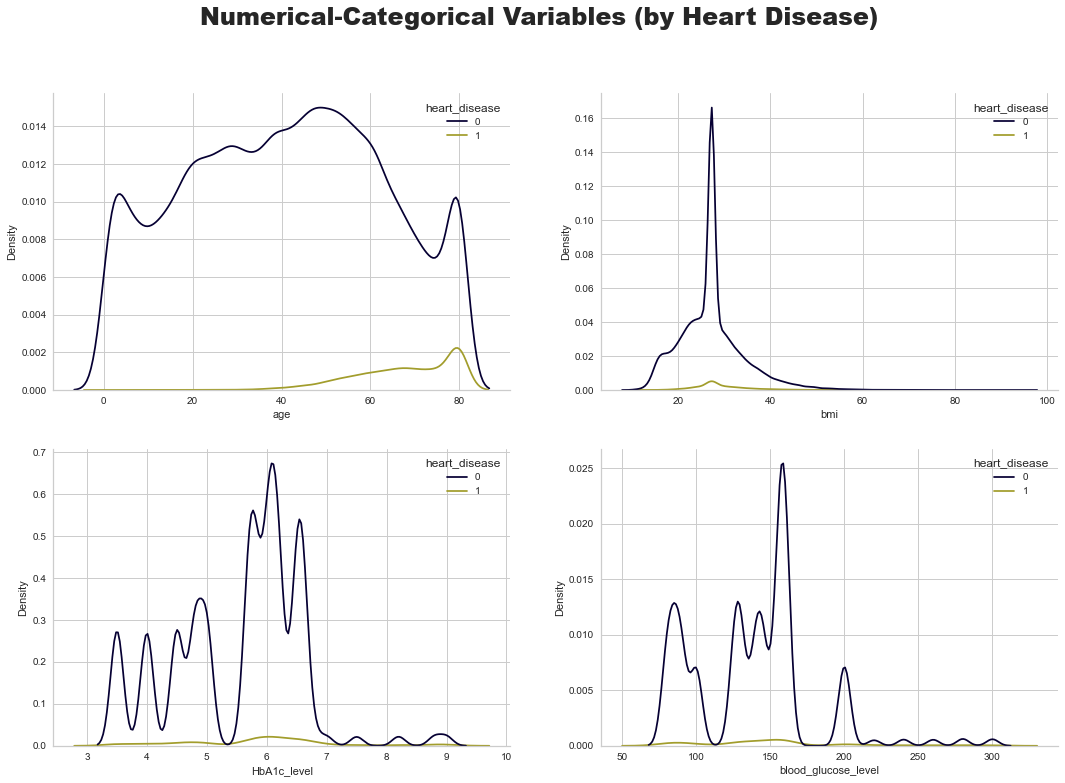

In [ ]:
# -- Konfigurasi Warna --
colors = "blend:#060033,#A29D2C"

# -- Figur --
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,2)
plt.suptitle('Numerical-Categorical Variables (by Heart Disease)', fontweight='heavy', fontsize='24')

# -- KDE Plot --
ax1 = fig.add_subplot(gs[0,0])
sns.kdeplot(data=df, x='age', hue='heart_disease', palette=colors, ax=ax1)
sns.despine()

ax2 = fig.add_subplot(gs[0,1])
sns.kdeplot(data=df, x='bmi', hue='heart_disease', palette=colors, ax=ax2)
sns.despine()

ax3 = fig.add_subplot(gs[1,0])
sns.kdeplot(data=df, x='HbA1c_level', hue='heart_disease', palette=colors, ax=ax3)
sns.despine()

ax4 = fig.add_subplot(gs[1,1])
sns.kdeplot(data=df, x='blood_glucose_level', hue='heart_disease', palette=colors, ax=ax4)
sns.despine()


plt.show()

<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <i>Insight</i>:
    <ol>
        <li>Grafik dengan hue heart disease memiliki kemiripan dengan grafik hue hipertensi.</li>
        <li>Orang dengan hipertensi kemungkinan juga memiliki penyakit jantung.</li>
    </ol>
</div>

### <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">Numerikal vs kategorikal (by Smoking History) </div>

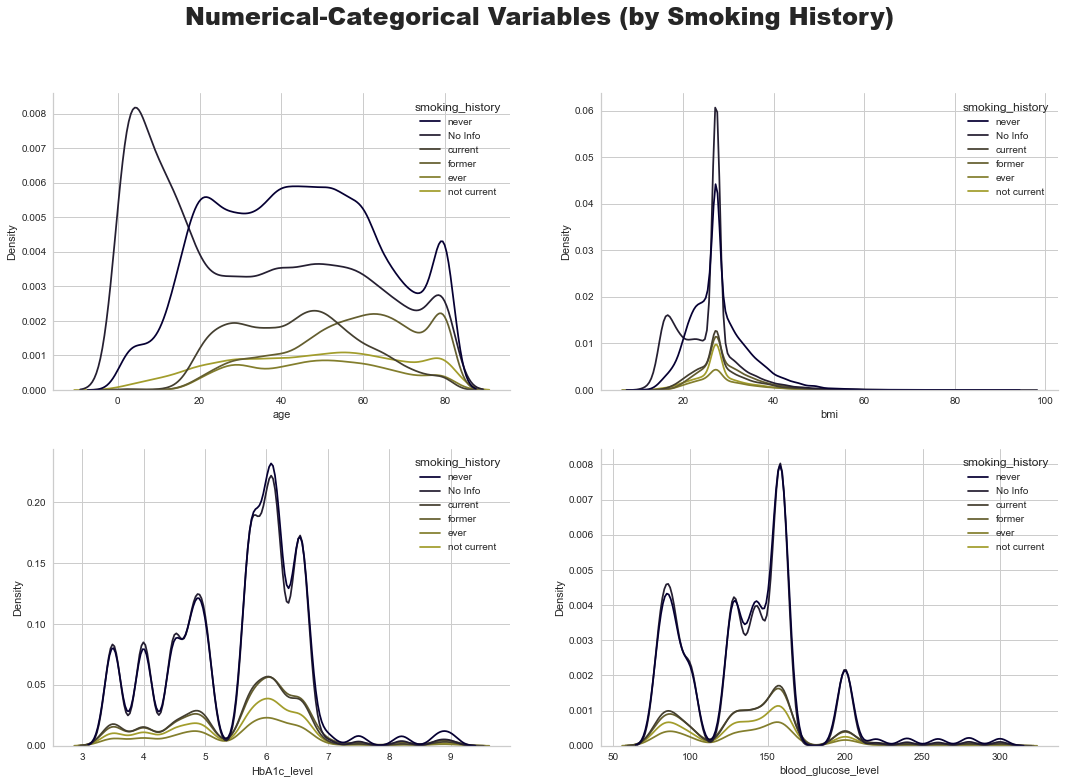

In [ ]:
# -- Konfigurasi Warna --
colors = "blend:#060033,#A29D2C"

# -- Figur --
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,2)
plt.suptitle('Numerical-Categorical Variables (by Smoking History)', fontweight='heavy', fontsize='24')

# -- KDE Plot --
ax1 = fig.add_subplot(gs[0,0])
sns.kdeplot(data=df, x='age', hue='smoking_history', palette=colors, ax=ax1)
sns.despine()

ax2 = fig.add_subplot(gs[0,1])
sns.kdeplot(data=df, x='bmi', hue='smoking_history', palette=colors, ax=ax2)
sns.despine()

ax3 = fig.add_subplot(gs[1,0])
sns.kdeplot(data=df, x='HbA1c_level', hue='smoking_history', palette=colors, ax=ax3)
sns.despine()

ax4 = fig.add_subplot(gs[1,1])
sns.kdeplot(data=df, x='blood_glucose_level', hue='smoking_history', palette=colors, ax=ax4)
sns.despine()


plt.show()

<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <i>Insight</i>:
    <ol>
        <li>Orang-orang dengan status perokok aktif kebanyakan di usia 20-60 tahun.</li>
        <li>Dari keseluruhan data, lebih banyak orang yang tidak merokok.</li>
        <li>Dilihat dari grafik HbA1c dan gula darah, status merokok tidak berpengaruh terhadap HbA1c dan gula darah.</li>
    </ol>
</div>

### <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">Kategorikal vs kategorikal </div>

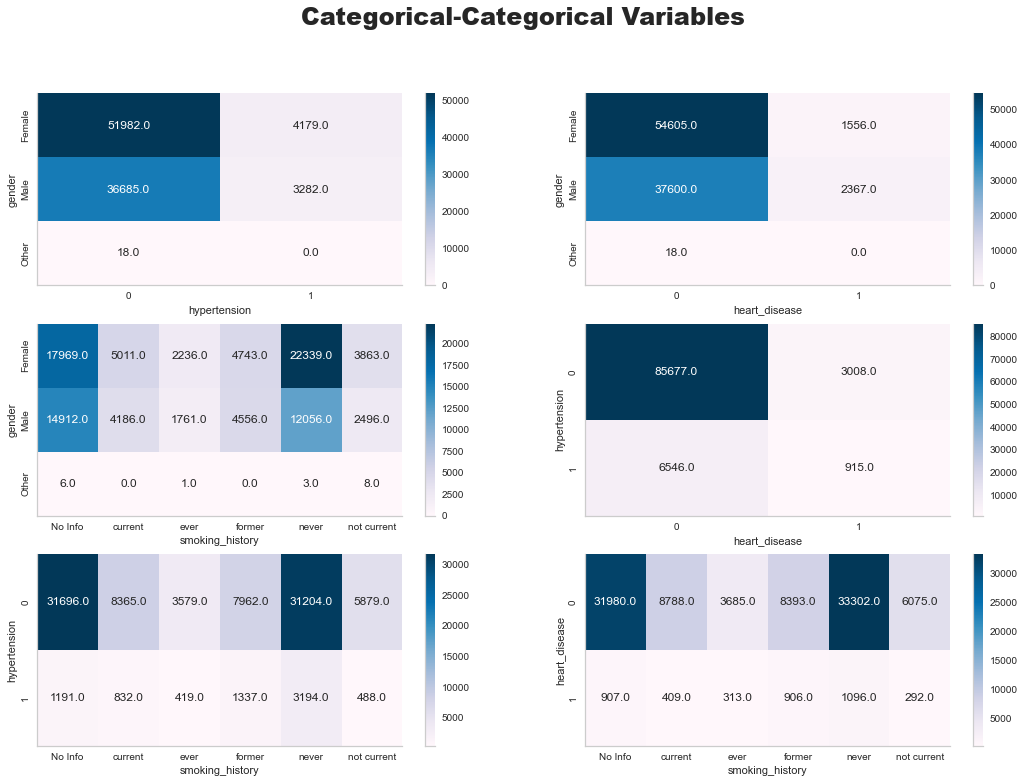

In [ ]:
# -- Konfigurasi Warna --
colors = "blend:#060033,#A29D2C"

# -- Figur --
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(3,2)
plt.suptitle('Categorical-Categorical Variables', fontweight='heavy', fontsize='24')

# -- KDE Plot --
ax1 = fig.add_subplot(gs[0,0])
sns.heatmap(pd.crosstab(df['gender'], df['hypertension']), cmap='PuBu', annot=True, fmt='.1f', ax=ax1)
sns.despine()

ax2 = fig.add_subplot(gs[0,1])
sns.heatmap(pd.crosstab(df['gender'], df['heart_disease']), cmap='PuBu', annot=True, fmt='.1f', ax=ax2)
sns.despine()

ax3 = fig.add_subplot(gs[1,0])
sns.heatmap(pd.crosstab(df['gender'], df['smoking_history']), cmap='PuBu', annot=True, fmt='.1f', ax=ax3)
sns.despine()

ax4 = fig.add_subplot(gs[1,1])
sns.heatmap(pd.crosstab(df['hypertension'], df['heart_disease']), cmap='PuBu', annot=True, fmt='.1f', ax=ax4)
sns.despine()

ax5 = fig.add_subplot(gs[2,0])
sns.heatmap(pd.crosstab(df['hypertension'], df['smoking_history']), cmap='PuBu', annot=True, fmt='.1f', ax=ax5)
sns.despine()

ax6 = fig.add_subplot(gs[2,1])
sns.heatmap(pd.crosstab(df['heart_disease'], df['smoking_history']), cmap='PuBu', annot=True, fmt='.1f', ax=ax6)
sns.despine()


plt.show()

<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <i>Insight</i>:
    <ol>
        <li>Variabel gender dan hypertension yang paling berkorelasi adalah gender female dan hypertension 0.</li>
        <li>Variabel gender dan heart disease yang paling berkorelasi adalah female dan heart disease 0.</li>
        <li>Variabel gender dan smoking history yang paling berkorelasi adalah female dan never.</li>
        <li>Variabel hypertension dan heart disease yang paling berkorelasi adalah 0.</li>
        <li>Variabel hypertension dan smoking history yang paling berkorelasi adalah hypertension 0 dan smoking history no info.</li>
        <li>Variabel heart disease dan smoking history yang paling berkorelasi adalah heart disease 0 dan never.</li>
    </ol>
</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">5 | Variabel Target </div>

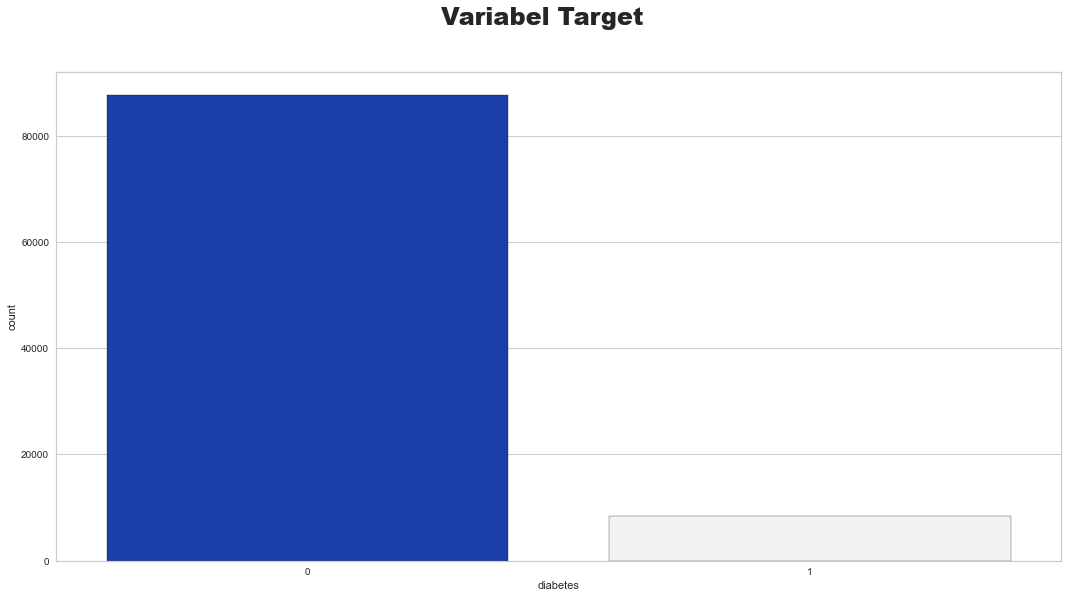

In [ ]:
# -- Konfigurasi Warna --
colors = ['#0433BF', '#F2F2F2']

# -- Figur --
plt.figure(figsize=(18,9))
plt.suptitle("Variabel Target", fontweight='heavy', fontsize='24')

# -- Bar Chart --
sns.countplot(x='diabetes', data=df, palette=colors, edgecolor='#000000')

plt.show()

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">6 | Korelasi Keseluruhan Variabel </div>

In [ ]:
# -- Label Encoder --
df['gender'] = LabelEncoder().fit_transform(df['gender']) ## Female=0, Male=1, Others=2
df['smoking_history'] = LabelEncoder().fit_transform(df['smoking_history']) ## No Info=0, current=1, ever=2, former=3, never=4, not current=5

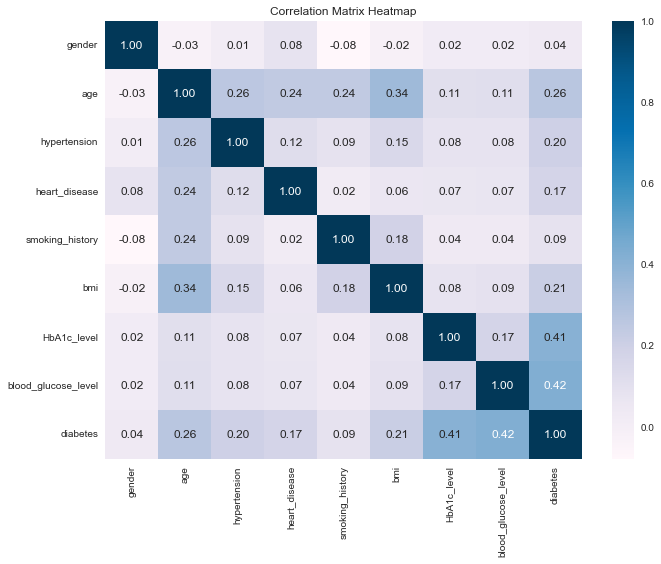

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='PuBu', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

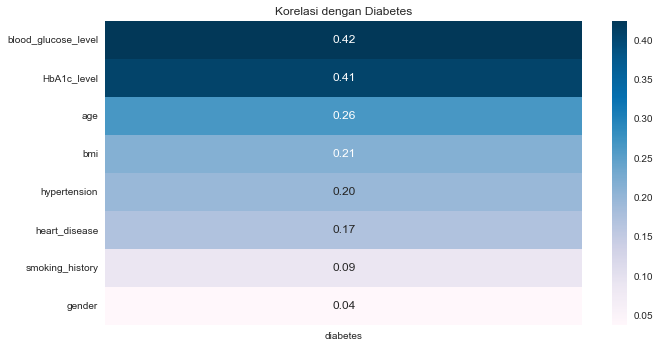

In [ ]:
corr = df.corr()
target_corr = corr['diabetes'].drop('diabetes')
target_corr = target_corr.sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.heatmap(target_corr.to_frame(), cmap='PuBu', annot=True, fmt='.2f')
plt.title('Korelasi dengan Diabetes')
plt.tight_layout()
plt.show

<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Kesimpulan: Variabel yang paling berkorelasi terhadap diagnosa diabetes adalah tingkat gula darah dan tingkat hemoglobin A1c.
</div>

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5; text-align: center;">V | Pemrosesan Awal Data </div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1 | Pemisahan Data </div>

In [ ]:
x = df.drop(['diabetes'], axis=1)
y = df['diabetes']

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">2 | Normalisasi Data </div>

In [ ]:
x = MinMaxScaler().fit_transform(x)

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">3 | Inisiasi Data Latih dan Data Uji </div>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5; text-align: center;">VI | Implementasi Model </div>

In [ ]:
n_estimators = [100, 120, 125, 150, 160, 175, 200]
max_depth = [2, 4, 5, 6, 8]
parameters = {'n_estimators': n_estimators, 'max_depth': max_depth}

rf_clf = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5)
grid = GridSearchCV(rf_clf, param_grid=parameters, cv=cv, n_jobs=-1, error_score='raise')

grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9713453850511818
{'max_depth': 4, 'n_estimators': 100}
RandomForestClassifier(max_depth=4)


In [ ]:
# -- Skor Akurasi --
grid_acc = accuracy_score(y_pred, y_test)
print('Skor Akurasi: '+'{:.2f}'.format(grid_acc*100)+'\n')

Skor Akurasi: 96.84



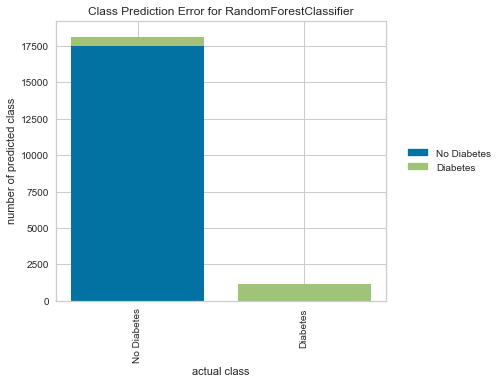

ClassPredictionError(ax=<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=['No Diabetes', 'Diabetes'],
                     estimator=RandomForestClassifier(max_depth=4))

In [ ]:
classes=['No Diabetes', 'Diabetes']

# -- Class Prediction Error --
class_prediction_error(RandomForestClassifier(max_depth=4), x_train, y_train, x_test, y_test, classes=classes)

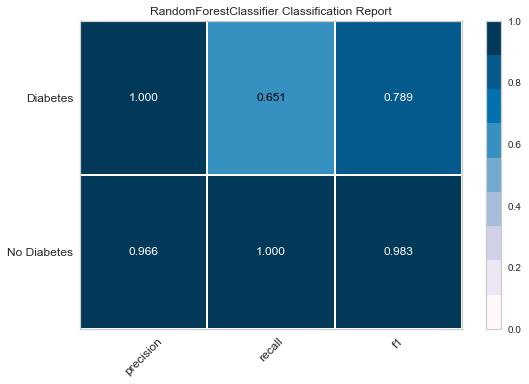

ClassificationReport(ax=<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>,
                     classes=['No Diabetes', 'Diabetes'],
                     cmap=<matplotlib.colors.ListedColormap object at 0x00000019278829A0>,
                     estimator=RandomForestClassifier(max_depth=4))

In [ ]:
# -- Classification Report --
classification_report(RandomForestClassifier(max_depth=4), x_train, y_train, x_test, y_test, classes=classes, cmap='PuBu')

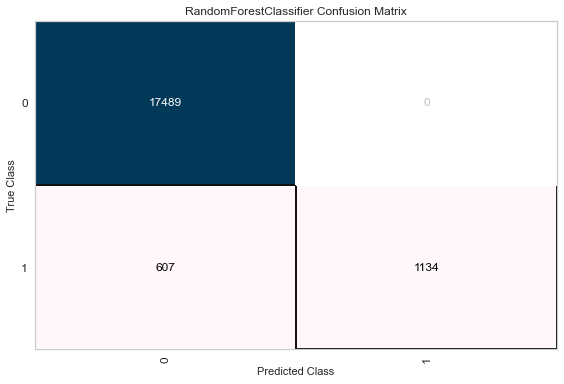

ConfusionMatrix(ax=<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000000193DE411C0>,
                estimator=RandomForestClassifier(max_depth=4))

In [ ]:
# -- Confusion Matrix --
confusion_matrix(RandomForestClassifier(max_depth=4), x_train, y_train, x_test, y_test, cmap='PuBu')

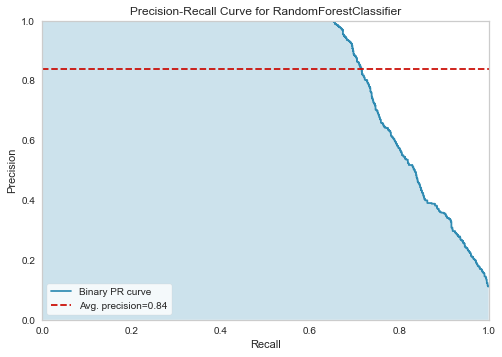

PrecisionRecallCurve(ax=<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>,
                     estimator=RandomForestClassifier(max_depth=4),
                     iso_f1_values={0.2, 0.4, 0.6, 0.8})

In [ ]:
# -- Precision-Recall Curves --
precision_recall_curve(RandomForestClassifier(max_depth=4), x_train, y_train, x_test, y_test)

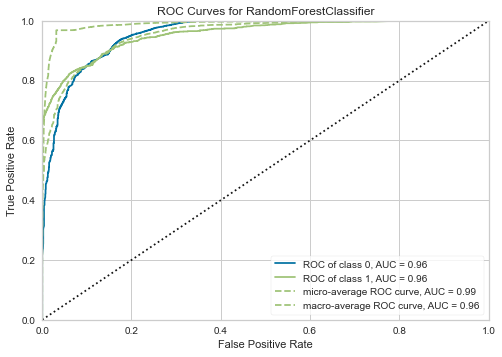

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=4))

In [ ]:
# -- ROCAUC --
roc_auc(RandomForestClassifier(max_depth=4), x_train, y_train, x_test, y_test)

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5; text-align: center;">VII | Prediksi </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Sebagai contoh, saya membuat sebuah data pasien baru (<i>dummy</i>) yang tidak ada di dalam dataset. Data ini akan digunakan untuk memprediksi apakah pasien memiliki diabetes atau tidak. Data pasien adalah sebagai berikut:
    <ul>
        <li><b>Gender (dalam skala)</b>: 0.5 (Male)</li>
        <li><b>Age (dalam skala)</b>: 0.34 (27)</li>
        <li><b>Hypertension</b>: 0 (No)</li>
        <li><b>Heart Disease</b>: 0 (No)</li>
        <li><b>Smoking History (dalam skala)</b>: 0.40 (Ever)</li>
        <li><b>BMI (dalam skala)</b>: 0.19 (26.1)</li>
        <li><b>Hemoglobin A1c (dalam skala)</b>: 0.22 (4.7)</li>
        <li><b>Blood Glucose Level (dalam skala)</b>: 0.41 (171)</li>
    </ul>
</div>

In [ ]:
test = [[0.50, 0.34, 0, 0, 0.40, 0.19, 0.22, 0.41]]

result = grid.predict(test)

if result[0] == 1:
    print('Terindikasi Diabetes!')
else:
    print('Tidak Terindikasi Diabetes!')

Tidak Terindikasi Diabetes!


# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5; text-align: center;">VIII | Referensi </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <ol>
        <li><a href="https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset">Diabetes prediction dataset by MOHAMMED MUSTAFA - Kaggle</a></li>
        <li><a href="https://github.com/nikitaprasad21/ML-Cheat-Codes/blob/main/Understanding-Data/descriptive_stats.ipynb">ML-Cheat-Codes/Understanding-Data/descriptive_stats.ipynb at main - nikitaprasad21</a></li>
        <li><a href="https://www.kaggle.com/code/pythonafroz/step-by-step-guide-to-gridsearchcv">Step by step 📈 guide to GridSearchCV by AFROZ - Kaggle</a></li>
    </ol>
</div>

<center>
    <div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 10px;">
        Prediksi Diabetes menggunakan Random Forest Classifier (Version 1) | Released: 25 February 2024 | rafiromolo
    </div>
</center>